![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Cumulative flux
</b>
</span>

**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Plot cumulative sums per year
- Includes option to
        - highlight specific year
        - calculate and show a reference
        - exclude specific years from reference        

</br>

# **Imports**

In [9]:
import importlib.metadata
import warnings
from datetime import datetime

warnings.simplefilter("ignore", UserWarning)

from diive.core.plotting.cumulative import Cumulative
from diive.core.io.files import load_parquet
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


</br>

# **Load data**

Loaded .parquet file 21.2_FluxProcessingChain_L4.1_NEE-L0_PRELIMINARY.parquet (0.072 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


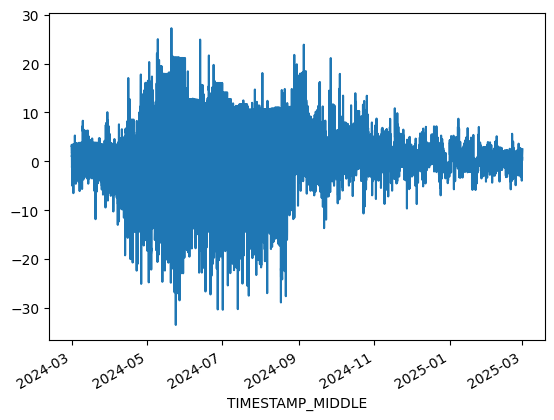

In [18]:
SOURCEFILE = r"21.2_FluxProcessingChain_L4.1_NEE-L0_PRELIMINARY.parquet"
df = load_parquet(filepath=SOURCEFILE)
series = df['NEE_L3.1_L3.3_CUT_QCF_gfRF'].copy()
series = series[(series.index >= "2024-03-01 00:00:00") & (series.index <= "2025-03-01 00:00:00")].copy()
series.plot(x_compat=True);

</br>

# **Plot cumulative**

In [19]:
# The series is the CO2 ecosystem flux, convert to more approriate units for yearly sums
series = series.multiply(0.02161926)  # umol CO2 m-2 s-1 --> g C m-2 30min-1
series_units = r'($\mathrm{gC\ m^{-2}}$)'

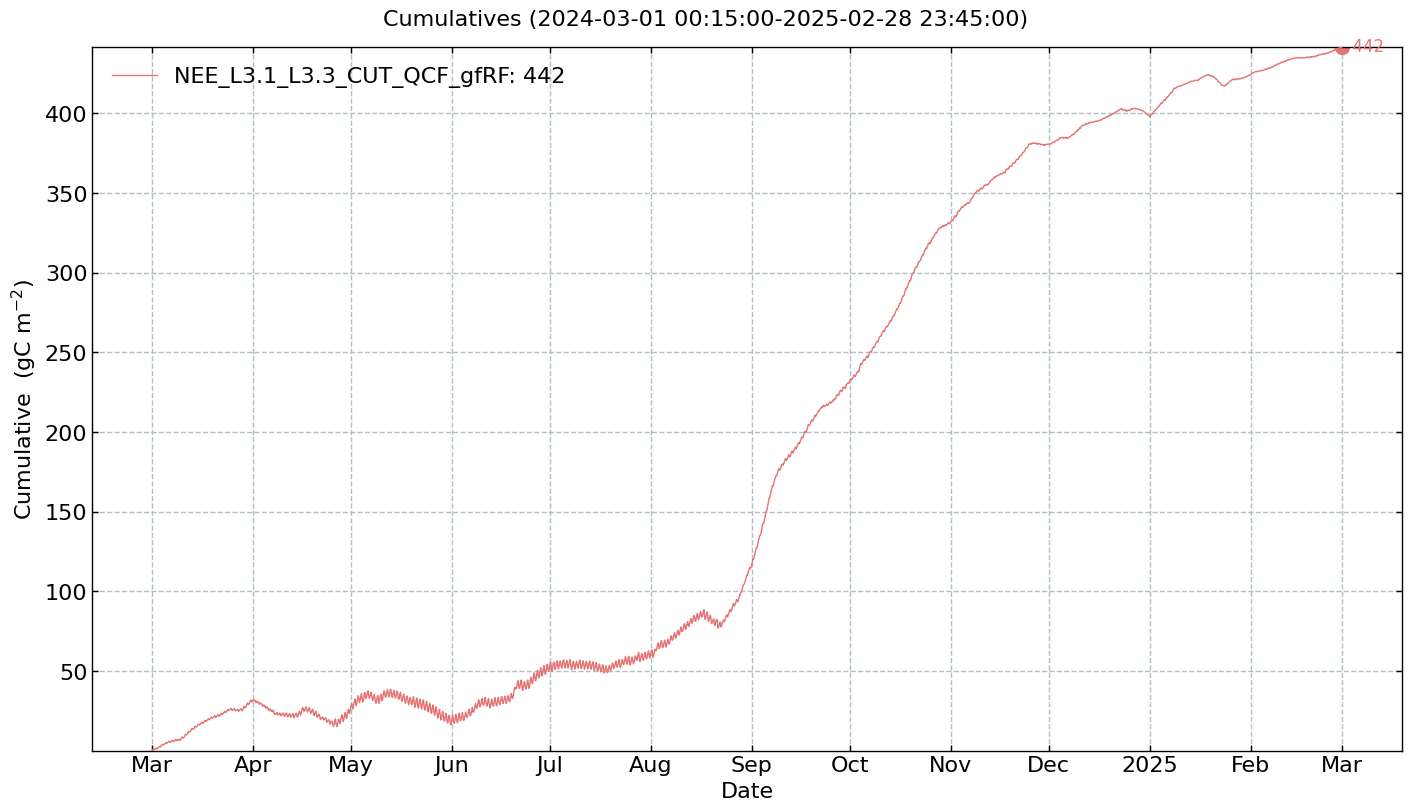

In [20]:
import pandas as pd
df = pd.DataFrame(series)
cumu = Cumulative(
    df=df,
    units=series_units,
    start_year=2024,
    end_year=2025)
cumu.plot()

</br>

# **End of notebook**

In [21]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-06-04 14:00:07
